<a href="https://colab.research.google.com/github/NishanthSamson/Heights-Distribution-Fitting/blob/main/Week_9_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing Heights of American males**
By Nishanth Samson
21f1005016@student.onlinedegree.iitm.ac.in

Dataset link:
https://docs.google.com/spreadsheets/d/1uspUDbPuGrHQQVCMHW3Z3L-bOeNfMqVJMxJxmy2UrQQ/edit?usp=sharing

**Importing packages:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import norm

**Opening the dataset:**

In [ ]:
df = pd.read_csv('/content/Heights.csv')

**Info about the structure of the dataset:**

In [ ]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(4999, 2)
Index(['Gender', 'Height'], dtype='object')
Gender     object
Height    float64
dtype: object


**Assigning the height values to a variable:**

In [ ]:
values = df['Height']

**Plotting a histogram for the data:**
(values vs counts)

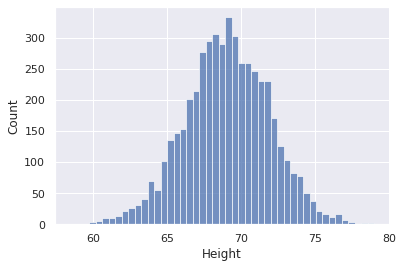

In [ ]:
sns.set(style = 'darkgrid')
sns.histplot(values)
plt.show()

**Mean, Standard deviation and Variance calculation:**

In [ ]:
mean = values.mean()
sd = values.std()
var = values.var()

print("Mean(µ): ",mean)
print("Standard Deviation(σ): ", sd)
print("Variance(σ²):", var)

Mean(µ):  69.02608074644722
Standard Deviation(σ):  2.863587270961926
Variance(σ²): 8.200132058415171


## **Method of Moments Estimators:**
For a normal distribution,
> M1 = E[x]

>Therefore,  M1 = µ

> M1 = 69.02608074644722

> M2 = µ² + σ² = 4764.59 + 8.20

> M2 = 4831.84

From the above analysis, we can observe that the method of moments is not a very good estimator for the normal distribution since it shows a great variance.

Since we know that this data best resembles a normal distribution, we'll proceed with the parameters µ = 69.02 and σ² = 8.20

Therefore, we have Normal(69.02, 8.20) and we'll proceed to plot this pdf compared with the pdf of the dataset.


In [ ]:
muMM = mean
sigmaMM = ((mean)**2 + (var)**2)
print("muMM is:", muMM)
print("sigmaMM is:", sigmaMM)

muMM is: 69.02608074644722
sigmaMM is: 4831.8419889905


## Maximum Likelihood Estimator:
ML estimator for the normal distribution is given by
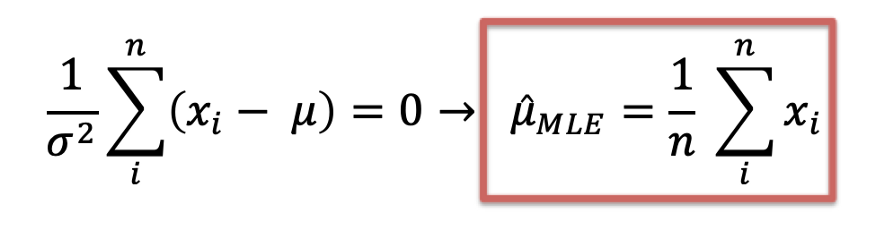
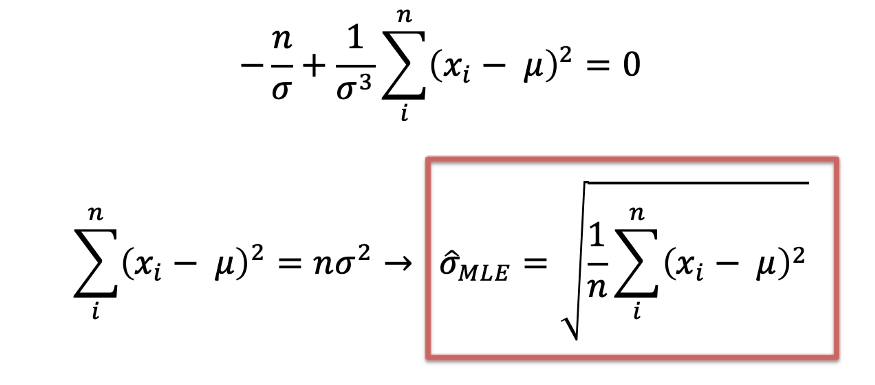



In [ ]:
muML = ((1/len(values))*(sum(values)))
values_list = list(values)
summation = 0
for l in values_list:
  summation += (((l)-(mean))**2)
sigmaML = np.sqrt((1/len(values))*summation)
print("muML is:", muML)
print("sigmaML is:", sigmaML)

muML is: 69.02608074644722
sigmaML is: 2.8633008406265295


##**Plotting a histogram along with the pdf of predicted distribution:**


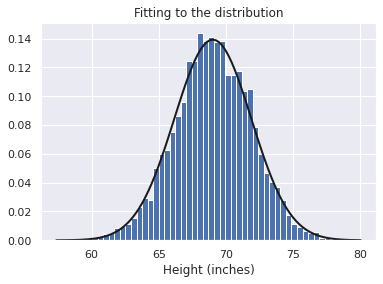

In [ ]:
mu, std = mean, sd

plt.hist(values, bins=50, density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Fitting to the distribution"
plt.title(title)

index = "Height (inches)"
plt.xlabel(index)

plt.show()

## **Bootstrap:**

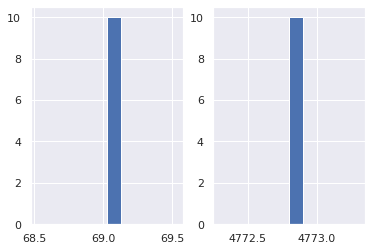

In [ ]:
N = 1000
n = 3935
muMM = 69.02
sigmaMM = 4831.84
mu_hat = np.zeros(N)
sigma_hat = np.zeros(N)
for i in np.arange(N):
  xi = st.norm.rvs(muMM,scale=1/sigmaMM,size=n)
  m1i = np.average(xi); ssi = np.var(xi)
  mu_hat[i] = mean; sigma_hat[i] = (mean)**2+(sd)**2

ax1 = plt.subplot(121)
ax1.hist(mu_hat,density=True)
ax2 = plt.subplot(122)
ax2.hist(sigma_hat,density=True)
plt.show()

The variance is too high in the Method of moments estimates. Therefore it is not a great choice of estimator for this distribution. Now let us try using ML estimators:

In [ ]:
N = 1000
n = 3935
muML = 69.02
sigmaML = 8.20
mu_hat = np.zeros(N)
sigma_hat = np.zeros(N)
for i in np.arange(N):
  xi = st.norm.rvs(muML,scale=1/sigmaML,size=n)
  m1i = np.average(xi); ssi = np.var(xi)
  mu_hat[i] = mean; sigma_hat[i] = var

(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([7.70013206, 7.80013206, 7.90013206, 8.00013206, 8.10013206,
        8.20013206, 8.30013206, 8.40013206, 8.50013206, 8.60013206,
        8.70013206]),
 <a list of 10 Patch objects>)

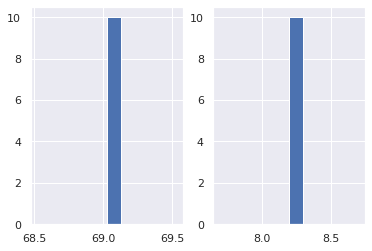

In [ ]:
ax1 = plt.subplot(121)
ax1.hist(mu_hat,density=True)
ax2 = plt.subplot(122)
ax2.hist(sigma_hat,density=True)

Here, we are getting very little spread here because we have chosen the ML estimates and the variance is also considerably small

Therefore the ML estimator does a better job here than the MM estimator.

## **Confidence Intervals**

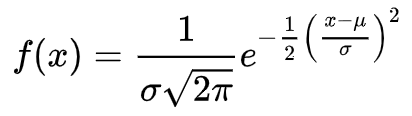

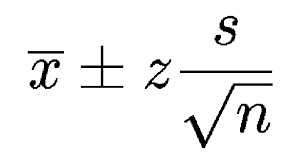

For a 95% confidence interval, we get Z = 1.960
we already know that, standard deviation (s) = 2.86
and n = 4999

Substituting these, we get our confidence interval as:


In [ ]:
lower_bound = mean - ((1.960)*(sd/np.sqrt(len(values))))
upper_bound = mean + ((1.960)*(sd/np.sqrt(len(values))))
confidence_interval = [lower_bound, upper_bound]
print("Confidence Interval of 95% is: ", confidence_interval)

Confidence Interval of 95% is:  [68.94669821826703, 69.10546327462741]


Therefore, we get the 95% confidence interval as ≈ [68.9, 69.1]